In [1]:
import matplotlib.pyplot as plt
import os
import pandas_datareader as pdr
import pandas as pd

In [2]:
pdr.__version__

'0.7.0'

In [3]:
#First I requested our Tiingo API key after creating an account here: https://www.tiingo.com
#And I saved our key in a text file on my computer, which I now read from file:
f = open("../../../keys/tiingo_api.txt", "r")
my_key = f.read()
f.close()

In [4]:
df = pdr.get_data_tiingo('VTI', \
    api_key=my_key)

In [5]:
df.head()

adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
VTI    2010-01-04 00:00:00+00:00  46.759058  46.816089  46.375586  46.391904   
       2010-01-05 00:00:00+00:00  46.938555  46.946714  46.595878  46.783534   
       2010-01-06 00:00:00+00:00  47.003827  47.089496  46.840647  46.914078   
       2010-01-07 00:00:00+00:00  47.199642  47.231462  46.742740  46.954873   
       2010-01-08 00:00:00+00:00  47.354662  47.359639  46.963032  47.077257   

                                  adjVolume  close  divCash     high    low  \
symbol date                                                                   
VTI    2010-01-04 00:00:00+00:00    2251461  57.31      0.0  57.3799  56.84   
       2010-01-05 00:00:00+00:00    1597643  57.53      0.0  57.5400  57.11   
       2010-01-06 00:00:00+00:00    2120206  57.61      0.0  57.7150  57.41   
       2010-01-07 00:00:00+00:00    1656639  57.85      0.0  57.8890  57.29   
       2010-01-08 00:00:00+00:00    1649919  58.04      0.0  58.0461  57.56   

                                   open  splitFactor   volume  
symbol date                                                    
VTI    2010-01-04 00:00:00+00:00  56.86          1.0  2251461  
       2010-01-05 00:00:00+00:00  57.34          1.0  1597643  
       2010-01-06 00:00:00+00:00  57.50          1.0  2120206  
       2010-01-07 00:00:00+00:00  57.55          1.0  1656639  
       2010-01-08 00:00:00+00:00  57.70          1.0  1649919

In [6]:
#len(df)/365.

In [7]:
#df.tail()

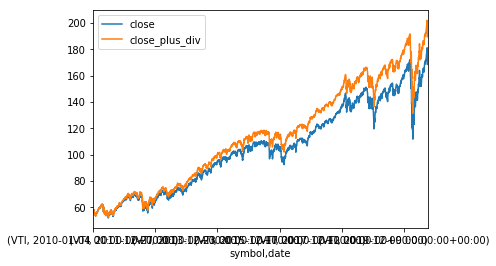

In [8]:
# simply add the cumulative sum of the dividends to the closing price
df['close_plus_div'] = df['close']+df['divCash'].cumsum()
df[['close','close_plus_div']].plot()

In [9]:
df.keys()

Index(['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'close',
       'divCash', 'high', 'low', 'open', 'splitFactor', 'volume',
       'close_plus_div'],
      dtype='object')

In [10]:
#how many days have VTI paid dividends
import numpy as np
print(np.sum(df['divCash']>0))
#date of first div
df.index[df['divCash']>0][0]

42


('VTI', Timestamp('2010-03-25 00:00:00+0000', tz='UTC'))

In [11]:
df[df['divCash']>0]

adjClose     adjHigh      adjLow  \
symbol date                                                            
VTI    2010-03-25 00:00:00+00:00   48.656834   49.287571   48.587207   
       2010-06-24 00:00:00+00:00   45.084570   45.669015   44.952865   
       2010-09-24 00:00:00+00:00   48.415906   48.440726   47.919502   
       2010-12-22 00:00:00+00:00   54.005412   54.080269   53.872332   
       2011-03-25 00:00:00+00:00   56.677819   56.961792   56.510775   
       2011-06-24 00:00:00+00:00   55.126821   55.797872   55.051328   
       2011-09-23 00:00:00+00:00   48.907858   49.194559   48.174240   
       2011-12-21 00:00:00+00:00   53.925973   54.027736   53.272993   
       2012-03-26 00:00:00+00:00   61.997484   61.997484   61.605742   
       2012-06-25 00:00:00+00:00   57.429428   57.780390   57.215426   
       2012-09-24 00:00:00+00:00   64.092577   64.247324   63.877530   
       2012-12-20 00:00:00+00:00   64.174295   64.182960   63.671714   
       2013-03-22 00:00:00+00:00   69.888112   69.914225   69.609569   
       2013-06-24 00:00:00+00:00   70.772485   71.371585   70.133941   
       2013-09-23 00:00:00+00:00   77.663444   77.935798   77.329483   
       2013-12-20 00:00:00+00:00   83.335503   83.512192   82.902614   
       2014-03-25 00:00:00+00:00   86.156348   86.582249   85.703827   
       2014-06-24 00:00:00+00:00   89.997448   90.942693   89.909240   
       2014-09-24 00:00:00+00:00   91.909500   91.963201   90.969730   
       2014-12-22 00:00:00+00:00   96.063283   96.072281   95.622420   
       2015-03-25 00:00:00+00:00   96.538337   98.310180   96.538337   
       2015-06-26 00:00:00+00:00   98.968293   99.313288   98.641455   
       2015-09-25 00:00:00+00:00   90.895400   92.045166   90.402643   
       2015-12-21 00:00:00+00:00   94.639440   94.777091   93.942010   
       2016-03-15 00:00:00+00:00   94.263195   94.281634   93.820645   
       2016-06-14 00:00:00+00:00   98.116148   98.464439   97.569772   
       2016-09-13 00:00:00+00:00  101.365695  102.380097  101.039970   
       2016-12-20 00:00:00+00:00  109.440889  109.497075  109.191798   
       2017-03-24 00:00:00+00:00  113.029299  113.574880  112.558971   
       2017-06-21 00:00:00+00:00  117.831351  118.313298  117.661252   
       2017-09-22 00:00:00+00:00  121.831513  121.897947  121.470963   
       2017-12-21 00:00:00+00:00  131.201634  131.544969  131.029967   
       2018-03-22 00:00:00+00:00  130.196521  132.743949  130.100753   
       2018-06-22 00:00:00+00:00  136.999301  137.608657  136.922363   
       2018-09-28 00:00:00+00:00  144.610673  144.935358  144.204816   
       2018-12-24 00:00:00+00:00  116.365836  119.126730  116.336672   
       2019-03-25 00:00:00+00:00  139.465961  140.071953  138.688924   
       2019-06-17 00:00:00+00:00  144.399122  144.870020  144.350070   
       2019-09-16 00:00:00+00:00  150.255924  150.482599  149.841996   
       2019-12-24 00:00:00+00:00  161.950380  162.227828  161.762112   
       2020-03-26 00:00:00+00:00  130.523049  131.040721  124.101924   
       2020-06-25 00:00:00+00:00  155.640000  155.770000  152.410000   

                                     adjOpen  adjVolume    close  divCash  \
symbol date                                                                 
VTI    2010-03-25 00:00:00+00:00   49.090977    2436920   59.400   0.2360   
       2010-06-24 00:00:00+00:00   45.636089    1815844   54.770   0.2690   
       2010-09-24 00:00:00+00:00   47.969143    2377665   58.520   0.2970   
       2010-12-22 00:00:00+00:00   53.905602    2097529   64.930   0.3460   
       2011-03-25 00:00:00+00:00   56.652762    1956722   67.860   0.2830   
       2011-06-24 00:00:00+00:00   55.781095    1942126   65.720   0.2830   
       2011-09-23 00:00:00+00:00   48.309158    4869056   58.000   0.3060   
       2011-12-21 00:00:00+00:00   53.815729    1728212   63.590   0.3610   
       2012-03-26 00:00:00+00:00   61.605742    1584997   72.800   0.3080   
       2012-06-25 00

In [12]:
#calculate the return on each day relative to the closing price on the day the first dividend is paid
percent_return_post_div = df['close']/df['close'][df['divCash']>0][0]

#Now multiply by the value of the first dividend to get grown value of the first paid dividend each day
df['daily_cash_value_of_paid_div'] = df['divCash'][df['divCash']>0][0] * percent_return_post_div

#we don't get any cash return on div before it's paid, 
#so we set the the daily cash return to zero for days before dividend payment date
df['daily_cash_value_of_paid_div'].loc[:df.index[df['divCash']>0][0]] = 0

df['daily_cash_value_of_all_paid_div'] = df['daily_cash_value_of_paid_div']

print(df['daily_cash_value_of_paid_div'])

symbol  date                     
VTI     2010-01-04 00:00:00+00:00    0.000000
        2010-01-05 00:00:00+00:00    0.000000
        2010-01-06 00:00:00+00:00    0.000000
        2010-01-07 00:00:00+00:00    0.000000
        2010-01-08 00:00:00+00:00    0.000000
        2010-01-11 00:00:00+00:00    0.000000
        2010-01-12 00:00:00+00:00    0.000000
        2010-01-13 00:00:00+00:00    0.000000
        2010-01-14 00:00:00+00:00    0.000000
        2010-01-15 00:00:00+00:00    0.000000
        2010-01-19 00:00:00+00:00    0.000000
        2010-01-20 00:00:00+00:00    0.000000
        2010-01-21 00:00:00+00:00    0.000000
        2010-01-22 00:00:00+00:00    0.000000
        2010-01-25 00:00:00+00:00    0.000000
        2010-01-26 00:00:00+00:00    0.000000
        2010-01-27 00:00:00+00:00    0.000000
        2010-01-28 00:00:00+00:00    0.000000
        2010-01-29 00:00:00+00:00    0.000000
        2010-02-01 00:00:00+00:00    0.000000
        2010-02-02 00:00:00+00:00    0.000000


/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
df['daily_cash_value_of_all_paid_div'] = 0.

#iterate through each row with a dividend payment
for row_id,series in df[df['divCash']>0].iterrows():
    #calculate the return on each day relative to the closing price on the day this current dividend is paid
    percent_return_post_div = df['close']/series['close']
    df['daily_cash_value_of_paid_div'] = series['divCash'] * percent_return_post_div

    #we don't get any cash return on div before it's paid,
    #so we set the the daily cash return to zero for days before dividend payment date
    df['daily_cash_value_of_paid_div'].loc[:row_id] = 0
    
    #now we add this dividend's daily value to all the other dividends
    df['daily_cash_value_of_all_paid_div'] = df['daily_cash_value_of_all_paid_div']+df['daily_cash_value_of_paid_div']

print(df['daily_cash_value_of_all_paid_div'])

symbol  date                     
VTI     2010-01-04 00:00:00+00:00     0.000000
        2010-01-05 00:00:00+00:00     0.000000
        2010-01-06 00:00:00+00:00     0.000000
        2010-01-07 00:00:00+00:00     0.000000
        2010-01-08 00:00:00+00:00     0.000000
        2010-01-11 00:00:00+00:00     0.000000
        2010-01-12 00:00:00+00:00     0.000000
        2010-01-13 00:00:00+00:00     0.000000
        2010-01-14 00:00:00+00:00     0.000000
        2010-01-15 00:00:00+00:00     0.000000
        2010-01-19 00:00:00+00:00     0.000000
        2010-01-20 00:00:00+00:00     0.000000
        2010-01-21 00:00:00+00:00     0.000000
        2010-01-22 00:00:00+00:00     0.000000
        2010-01-25 00:00:00+00:00     0.000000
        2010-01-26 00:00:00+00:00     0.000000
        2010-01-27 00:00:00+00:00     0.000000
        2010-01-28 00:00:00+00:00     0.000000
        2010-01-29 00:00:00+00:00     0.000000
        2010-02-01 00:00:00+00:00     0.000000
        2010-02-02 00:00:0

In [14]:
#Now we add the daily value of the dividends to the closing price of the stock
df['close_div_reinvest'] = df['close']+df['daily_cash_value_of_all_paid_div']

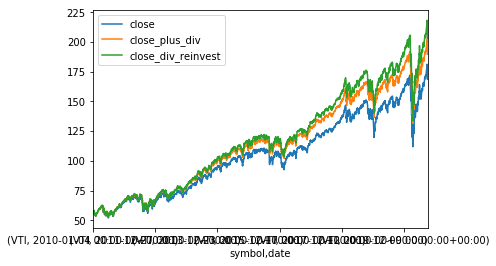

In [15]:
df[['close','close_plus_div','close_div_reinvest']].plot()

[Text(0, 0, ' 2010'),
 Text(0, 0, ' 2011'),
 Text(0, 0, ' 2013'),
 Text(0, 0, ' 2015'),
 Text(0, 0, ' 2017'),
 Text(0, 0, ' 2019'),
 Text(0, 0, '')]

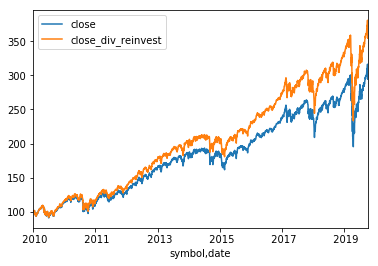

In [16]:
normalized_df=(df/df.iloc[0])*100
ax1 = normalized_df[['close','close_div_reinvest']].plot()

labels = [item.get_text() for item in ax1.get_xticklabels()]
for ii in np.arange(len(labels)):
    labels[ii] = labels[ii][5:10]

ax1.set_xticklabels(labels)

In [17]:
import matplotlib
print(matplotlib.__version__)

3.0.2


In [18]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [19]:
ticker = 'VTI'
df = pdr.get_data_tiingo(ticker, \
    api_key=my_key)

df = df.loc['VTI']

In [20]:
# simply add the cumulative sum of the dividends to the closing price
df['close_plus_div'] = df['close']+df['divCash'].cumsum()

#initialize
df['daily_cash_value_of_all_paid_div'] = 0.

#iterate through each row with a dividend payment
for row_id,series in df[df['divCash']>0].iterrows():
    #calculate the return on each day relative to the closing price on the day this current dividend is paid
    percent_return_post_div = df['close']/series['close']
    df['daily_cash_value_of_paid_div'] = series['divCash'] * percent_return_post_div

    #we don't get any cash return on div before it's paid,
    #so we set the the daily cash return to zero for days before dividend payment date
    df['daily_cash_value_of_paid_div'].loc[:row_id] = 0
    
    #now we add this dividend's daily value to all the other dividends
    df['daily_cash_value_of_all_paid_div'] = df['daily_cash_value_of_all_paid_div']+df['daily_cash_value_of_paid_div']

    
#Now we add the daily value of the dividends to the closing price of the stock
df['close_div_reinvest'] = df['close']+df['daily_cash_value_of_all_paid_div']

normalized_df=(df/df.iloc[0])*100


In [21]:
df.iloc[-1].name

Timestamp('2020-09-09 00:00:00+0000', tz='UTC')

In [22]:
#access last series
#get date and value for label

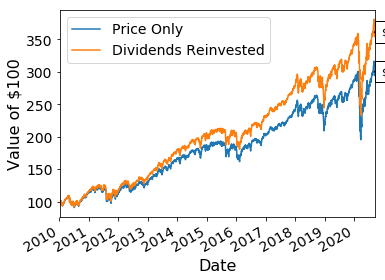

In [23]:
%matplotlib inline
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

fig, ax = plt.subplots()
ax = normalized_df[['close','close_div_reinvest']].plot(ax=ax)

ab ={}
for key_now in ['close','close_div_reinvest']:
    xy = (df.iloc[-1].name, normalized_df.iloc[-1][key_now])

    # Annotate the 1st position with another text box ('Test')
    offsetbox = TextArea( "\$%6.2f" % (xy[1]), minimumdescent=False)

    ab[key_now] = AnnotationBbox(offsetbox, xy,
                        xybox=(1.02, xy[1]),
                        xycoords='data',
                        boxcoords=("axes fraction", "data"),
                        box_alignment=(0., 0.5),
                        arrowprops=dict(arrowstyle="->"))

    ax.add_artist(ab[key_now])
'''
labels = [item.get_text() for item in ax1.get_xticklabels()]
for ii in np.arange(len(labels)):
    if len(ticker) == 3:
        labels[ii] = labels[ii][5:10]
    if len(ticker) == 4:
        labels[ii] = labels[ii][6:11]

ax1.set_xticklabels(labels)
'''
#ax1.set_ylim((80.04060092078832, 318.37962634482693))
ax.set_xlabel('Date')
ax.set_ylabel('Value of \$100')

L=plt.legend()
L.get_texts()[0].set_text('Price Only')
L.get_texts()[1].set_text('Dividends Reinvested')

#fig.autofmt_xdate()
fig.tight_layout()
fig.subplots_adjust(right=0.875)
fig.savefig('../reports/figures/test.png')

In [24]:
#Save the data to file to make a plot in datawrapper after simplying the date format, so datawrapper can read it.

In [25]:
normalized_df.index = normalized_df.index.strftime('%Y-%m-%d')

In [26]:
normalized_df[['close','close_plus_div','close_div_reinvest']].to_csv('../data/interim/VTI.csv')

In [27]:
normalized_df.iloc[::7, :][['close','close_plus_div','close_div_reinvest']].to_csv('../data/interim/VTI_7th.csv')


In [28]:
normalized_df

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume,close_plus_div,daily_cash_value_of_all_paid_div,daily_cash_value_of_paid_div,close_div_reinvest
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,NaN,NaN,100.000000
2010-01-05,100.383877,100.279018,100.475018,100.844179,70.960279,100.383877,NaN,100.279018,100.475018,100.844179,100.0,70.960279,100.383877,NaN,NaN,100.383877
2010-01-06,100.523469,100.584002,101.002815,101.125572,94.170230,100.523469,NaN,100.584002,101.002815,101.125572,100.0,94.170230,100.523469,NaN,NaN,100.523469
2010-01-07,100.942244,100.887244,100.791696,101.213507,73.580622,100.942244,NaN,100.887244,100.791696,101.213507,100.0,73.580622,100.942244,NaN,NaN,100.942244
2010-01-08,101.273774,101.161034,101.266714,101.477313,73.282149,101.273774,NaN,101.161034,101.266714,101.477313,100.0,73.282149,101.273774,NaN,NaN,101.273774
2010-01-11,101.413366,101.690662,101.776918,102.532536,83.635160,101.413366,NaN,101.690662,101.776918,102.532536,100.0,83.635160,101.413366,NaN,NaN,101.413366
2010-01-12,100.366428,100.766993,100.809289,101.565248,76.840150,100.366428,NaN,100.766993,100.809289,101.565248,100.0,76.840150,100.366428,NaN,NaN,100.366428
2010-01-13,101.308672,101.394391,100.914849,101.494900,81.065450,101.308672,NaN,101.394391,100.914849,101.494900,100.0,81.065450,101.308672,NaN,NaN,101.308672
2010-01-14,101.483162,101.559954,101.935257,102.040098,74.041434,101.483162,NaN,101.559954,101.935257,102.040098,100.0,74.041434,101.483162,NaN,NaN,101.483162
2010-01-15,100.331530,101.342108,100.812104,102.180795,123.734055,100.331530,NaN,101.342108,100.812104,102.180795,100.0,123.734055,100.331530,NaN,NaN,100.331530


In [29]:
#let's scout out what data we need to make a paired plot of the average annual return 
#over the past 5 years for the most popular vanguard ETFs

In [30]:
#inputs:
#list of Vanguard Select ETFs
#normalized stock value with and without dividend reinvested
#Start date
#End date
#Duration in years

#outputs:
#average annual return with and without D.R.



In [31]:
van_list = [('Vanguard Select FundsIntermediate-Term Bond ETF', 'BIV'),
 ('Vanguard Select FundsLong-Term Bond ETF', 'BLV'),
 ('Vanguard Select FundsShort-Term Bond ETF', 'BSV'),
 ('Vanguard Select FundsShort-Term Inflation-Protected Securities ETF', 'VTIP'),
 ('Vanguard Select FundsTotal Bond Market ETF', 'BND'),
 ('Vanguard Select FundsTax-Exempt Bond ETF','VTEB'),
 ('Vanguard Select FundsS&P 500 ETF', 'VOO'),
 ('Vanguard Select FundsTotal Stock Market ETF','VTI'),
 ('Vanguard Select FundsExtended Market ETF','VXF'),
 ('Vanguard Select FundsTotal International Bond ETF','BNDX'),
 ('Vanguard Select FundsFTSE Developed Markets ETF','VEA'),
 ('Vanguard Select FundsTotal International Stock ETF','VXUS'),
 ('Vanguard Select FundsFTSE Emerging Markets ETF','VWO'),
 ('Dividend Appreciation ETF', 'VIG'),
 ('High Dividend Yield ETF', 'VYM'),
 ('Growth ETF', 'VUG')]

In [32]:
#get data
tickers = []
for van in van_list:
    tickers.append(van[1])

In [33]:
df_van = pdr.get_data_tiingo(tickers, \
    api_key=my_key)

In [34]:
df_van['splitFactor'][df_van['splitFactor'] != 1]

symbol  date                     
VOO     2013-10-24 00:00:00+00:00    0.5
Name: splitFactor, dtype: float64

In [35]:
df_van_dict = {}
for tick in tickers:
    df_van_dict[tick] = df_van.loc[tick]

In [36]:
df_van_dict['VTI']

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
date,,,,,,,,,,,,
2010-01-04 00:00:00+00:00,46.759058,46.816089,46.375586,46.391904,2251461,57.31,0.0,57.3799,56.8400,56.86,1.0,2251461
2010-01-05 00:00:00+00:00,46.938555,46.946714,46.595878,46.783534,1597643,57.53,0.0,57.5400,57.1100,57.34,1.0,1597643
2010-01-06 00:00:00+00:00,47.003827,47.089496,46.840647,46.914078,2120206,57.61,0.0,57.7150,57.4100,57.50,1.0,2120206
2010-01-07 00:00:00+00:00,47.199642,47.231462,46.742740,46.954873,1656639,57.85,0.0,57.8890,57.2900,57.55,1.0,1656639
2010-01-08 00:00:00+00:00,47.354662,47.359639,46.963032,47.077257,1649919,58.04,0.0,58.0461,57.5600,57.70,1.0,1649919
2010-01-11 00:00:00+00:00,47.419934,47.607590,47.199642,47.566796,1883013,58.12,0.0,58.3500,57.8500,58.30,1.0,1883013
2010-01-12 00:00:00+00:00,46.930396,47.175165,46.750899,47.118052,1730026,57.52,0.0,57.8200,57.3000,57.75,1.0,1730026
2010-01-13 00:00:00+00:00,47.370980,47.468888,46.799852,47.085416,1825157,58.06,0.0,58.1800,57.3600,57.71,1.0,1825157
2010-01-14 00:00:00+00:00,47.452570,47.546398,47.273073,47.338344,1667014,58.16,0.0,58.2750,57.9400,58.02,1.0,1667014


In [37]:
def norm_df(df, reinvest_on_open = True, normalize = True):
    # simply add the cumulative sum of the dividends to the closing price
    df['close_plus_div'] = df['close']+df['divCash'].cumsum()

    #initialize
    df['daily_cash_value_of_all_paid_div'] = 0.

    #iterate through each row with a dividend payment
    for row_id,series in df[df['divCash']>0].iterrows():
        row_id_number = np.flatnonzero(df.index == row_id)[0]
        #print(row_id)
        #calculate the return on each day relative to the closing price on the day this current dividend is paid
        if reinvest_on_open:
            a_value = df['open'].iloc[row_id_number+1]
        else:
            a_value = df['close'].iloc[row_id_number]
        percent_return_post_div = df['close']/a_value
        df['daily_cash_value_of_paid_div'] = series['divCash'] * percent_return_post_div

        #we don't get any cash return on div before it's paid,
        #so we set the the daily cash return to zero for days before dividend payment date
        df['daily_cash_value_of_paid_div'].loc[:row_id] = 0

        #now we add this dividend's daily value to all the other dividends
        df['daily_cash_value_of_all_paid_div'] = df['daily_cash_value_of_all_paid_div']+df['daily_cash_value_of_paid_div']


    #Now we add the daily value of the dividends to the closing price of the stock
    df['close_div_reinvest'] = df['close']+df['daily_cash_value_of_all_paid_div']

    if normalize:
        normalized_df=(df/df.iloc[0])*100
        return normalized_df
    else:
        return df

In [38]:
df_van_norm_dict = {}

In [123]:
#for tick in tickers:
#    df_van_norm_dict[tick] = norm_df(df_van_dict[tick], reinvest_on_open = False)

/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a

In [124]:
#df_van_norm_dict.keys()

dict_keys(['BIV', 'BLV', 'BSV', 'VTIP', 'BND', 'VTEB', 'VOO', 'VTI', 'VXF', 'BNDX', 'VEA', 'VXUS', 'VWO', 'VIG', 'VYM', 'VUG'])

In [247]:
#let's create a simulated dataframe to test out our norm code.
#copy an existing df so we can keep the headers and stuff.
'''df_copy = df_van_dict['VTI'].copy()
df_copy = df_copy.iloc[0:6]
df_copy['divCash'] = [0., 0.5, 0., 0.5, 0., 0.]
df_copy['close'] = [1, 1, 2, 3, 4, 5]
df_copy['open'] = [1, 1, 1, 2, 3, 4]
df_copy_norm = norm_df(df_copy, normalize = True, reinvest_on_open = True)
'''

2010-01-05 00:00:00+00:00
2010-01-07 00:00:00+00:00


In [257]:
#Let's remove all dates before Aug 31, 2015
df_copy = df_van_dict['VTI'].copy()

In [263]:
df_copy.loc[pd.Timestamp('Sep 1, 2015'):]

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume,close_plus_div,daily_cash_value_of_all_paid_div,daily_cash_value_of_paid_div,close_div_reinvest
date,,,,,,,,,,,,,,,,
2015-09-01 00:00:00+00:00,90.071043,91.541812,89.653416,90.742876,9264707,99.21,0.000,100.8300,98.7500,99.95,1.0,9264707,107.6720,10.616079,0.000000,109.826079
2015-09-02 00:00:00+00:00,91.768783,91.768783,90.379723,91.496418,7680958,101.08,0.000,101.0800,99.5500,100.78,1.0,7680958,109.5420,10.816181,0.000000,111.896181
2015-09-03 00:00:00+00:00,91.877729,93.003504,91.605364,92.222725,5151309,101.20,0.000,102.4400,100.9000,101.58,1.0,5151309,109.6620,10.829022,0.000000,112.029022
2015-09-04 00:00:00+00:00,90.570378,91.155962,90.120341,90.715639,4317822,99.76,0.000,100.4050,99.2643,99.92,1.0,4317822,108.2220,10.674933,0.000000,110.434933
2015-09-08 00:00:00+00:00,92.858242,92.894558,91.750626,92.231803,3342020,102.28,0.000,102.3200,101.0600,101.59,1.0,3342020,110.7420,10.944588,0.000000,113.224588
2015-09-09 00:00:00+00:00,91.587207,93.875071,91.414709,93.729810,3691164,100.88,0.000,103.4000,100.6900,103.24,1.0,3691164,109.3420,10.794780,0.000000,111.674780
2015-09-10 00:00:00+00:00,92.059306,92.667587,91.360236,91.587207,3695957,101.40,0.000,102.0700,100.6300,100.88,1.0,3695957,109.8620,10.850423,0.000000,112.250423
2015-09-11 00:00:00+00:00,92.476932,92.495089,91.423788,91.732468,2007923,101.86,0.000,101.8800,100.7000,101.04,1.0,2007923,110.3220,10.899646,0.000000,112.759646
2015-09-14 00:00:00+00:00,92.122857,92.522326,91.877729,92.522326,3711098,101.47,0.000,101.9100,101.2000,101.91,1.0,3711098,109.9320,10.857913,0.000000,112.327913


In [ ]:
df_van_dict['VTI'].copy()

In [262]:
#look if any dividend days are on Aug 31, 2015 #NONE ARE PAID ON AUG 31, 2020
#for tick in tickers:
#    print(df_van_dict[tick]['divCash'].loc[pd.Timestamp('Aug 31, 2015')])

In [250]:
#df_copy_norm

In [226]:
#Dictionary for all dates and reinvesting on open the day after
df_van_norm_open_dict = {}

In [252]:
for tick in tickers:
    df_van_norm_open_dict[tick] = norm_df(df_van_dict[tick], reinvest_on_open = True)

/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a

In [264]:
#Dictionary for only dates after Aug 31, 2020 and reinvesting on open the day after
df_van_norm_open_2015_dict = {}
for tick in tickers:
    df_van_norm_open_2015_dict[tick] = norm_df(df_van_dict[tick].loc[pd.Timestamp('Aug 31, 2015'):], reinvest_on_open = True)

/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a

In [273]:
##Dictionary for only dates after Aug 31, 2020 and reinvesting on open the day after and no normalization to $100
#df_van_norm_open_2015_nonorm_dict = {}
#for tick in tickers:
#    df_van_norm_open_2015_nonorm_dict[tick] = norm_df(df_van_dict[tick].loc[pd.Timestamp('Aug 31, 2015'):], normalize = False, reinvest_on_open = True)

/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a

In [271]:
df_van_norm_open_dict['VTI'].loc[pd.Timestamp('Aug 31, 2015'):]

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume,close_plus_div,daily_cash_value_of_all_paid_div,daily_cash_value_of_paid_div,close_div_reinvest
date,,,,,,,,,,,,,,,,
2015-08-31 00:00:00+00:00,198.452868,199.762516,199.584845,200.649694,201.038392,178.345838,NaN,179.522795,179.363125,180.320084,100.0,201.038392,193.111150,inf,NaN,197.429938
2015-09-01 00:00:00+00:00,192.628011,195.534943,193.320289,195.600672,411.497556,173.111150,NaN,175.723555,173.733286,175.782624,100.0,411.497556,187.876461,inf,NaN,191.635106
2015-09-02 00:00:00+00:00,196.258839,196.019757,194.886428,197.224970,341.154388,176.374106,NaN,176.159247,175.140746,177.242350,100.0,341.154388,191.139417,inf,NaN,195.247218
2015-09-03 00:00:00+00:00,196.491833,198.657142,197.529287,198.790558,228.798500,176.583493,NaN,178.529415,177.515834,178.649314,100.0,228.798500,191.348805,inf,NaN,195.479012
2015-09-04 00:00:00+00:00,193.695902,194.710760,194.327120,195.541963,191.778672,174.070843,NaN,174.982877,174.638107,175.729863,100.0,191.778672,188.836154,inf,NaN,192.697492
2015-09-08 00:00:00+00:00,198.588781,198.424431,197.842515,198.810128,148.437837,178.467981,NaN,178.320283,177.797326,178.666901,100.0,148.437837,193.233293,inf,NaN,197.565151
2015-09-09 00:00:00+00:00,195.870515,200.518825,197.118176,202.039153,163.945278,176.025127,NaN,180.202475,177.146376,181.568765,100.0,163.945278,190.790438,inf,NaN,194.860896
2015-09-10 00:00:00+00:00,196.880157,197.939618,197.000715,197.420668,164.158162,176.932473,NaN,177.884590,177.040816,177.418220,100.0,164.158162,191.697784,inf,NaN,195.865334
2015-09-11 00:00:00+00:00,197.773301,197.571160,197.137752,197.733786,89.183113,177.735125,NaN,177.553464,177.163969,177.699613,100.0,89.183113,192.500436,inf,NaN,196.753875


In [272]:
df_van_norm_open_2015_dict['VTI'].loc[pd.Timestamp('Aug 31, 2015'):]

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume,close_plus_div,daily_cash_value_of_all_paid_div,daily_cash_value_of_paid_div,close_div_reinvest
date,,,,,,,,,,,,,,,,
2015-08-31 00:00:00+00:00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,NaN,NaN,100.000000
2015-09-01 00:00:00+00:00,97.064866,97.883701,96.861206,97.483663,204.686056,97.064866,NaN,97.883701,96.861206,97.483663,100.0,204.686056,97.064866,NaN,NaN,97.064866
2015-09-02 00:00:00+00:00,98.894433,98.126395,97.645905,98.293182,169.696138,98.894433,NaN,98.126395,97.645905,98.293182,100.0,169.696138,98.894433,NaN,NaN,98.894433
2015-09-03 00:00:00+00:00,99.011838,99.446656,98.970083,99.073442,113.808361,99.011838,NaN,99.446656,98.970083,99.073442,100.0,113.808361,99.011838,NaN,NaN,99.011838
2015-09-04 00:00:00+00:00,97.602974,97.471119,97.365669,97.454404,95.394054,97.602974,NaN,97.471119,97.365669,97.454404,100.0,95.394054,97.602974,NaN,NaN,97.602974
2015-09-08 00:00:00+00:00,100.068486,99.330162,99.127023,99.083195,73.835567,100.068486,NaN,99.330162,99.127023,99.083195,100.0,73.835567,100.068486,NaN,NaN,100.068486
2015-09-09 00:00:00+00:00,98.698757,100.378604,98.764100,100.692480,81.549239,98.698757,NaN,100.378604,98.764100,100.692480,100.0,81.549239,98.698757,NaN,NaN,98.698757
2015-09-10 00:00:00+00:00,99.207514,99.087467,98.705248,98.390715,81.655131,99.207514,NaN,99.087467,98.705248,98.390715,100.0,81.655131,99.207514,NaN,NaN,99.207514
2015-09-11 00:00:00+00:00,99.657568,98.903019,98.773909,98.546767,44.361234,99.657568,NaN,98.903019,98.773909,98.546767,100.0,44.361234,99.657568,NaN,NaN,99.657568


In [274]:
#df_van_norm_open_2015_nonorm_dict['VTI'].loc[pd.Timestamp('Aug 31, 2015'):]

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume,close_plus_div,daily_cash_value_of_all_paid_div,daily_cash_value_of_paid_div,close_div_reinvest
date,,,,,,,,,,,,,,,,
2015-08-31 00:00:00+00:00,92.794691,93.520997,92.558641,93.085213,4526301,102.21,0.000,103.0100,101.9500,102.53,1.0,4526301,102.2100,0.000000,0.000000,102.210000
2015-09-01 00:00:00+00:00,90.071043,91.541812,89.653416,90.742876,9264707,99.21,0.000,100.8300,98.7500,99.95,1.0,9264707,99.2100,0.000000,0.000000,99.210000
2015-09-02 00:00:00+00:00,91.768783,91.768783,90.379723,91.496418,7680958,101.08,0.000,101.0800,99.5500,100.78,1.0,7680958,101.0800,0.000000,0.000000,101.080000
2015-09-03 00:00:00+00:00,91.877729,93.003504,91.605364,92.222725,5151309,101.20,0.000,102.4400,100.9000,101.58,1.0,5151309,101.2000,0.000000,0.000000,101.200000
2015-09-04 00:00:00+00:00,90.570378,91.155962,90.120341,90.715639,4317822,99.76,0.000,100.4050,99.2643,99.92,1.0,4317822,99.7600,0.000000,0.000000,99.760000
2015-09-08 00:00:00+00:00,92.858242,92.894558,91.750626,92.231803,3342020,102.28,0.000,102.3200,101.0600,101.59,1.0,3342020,102.2800,0.000000,0.000000,102.280000
2015-09-09 00:00:00+00:00,91.587207,93.875071,91.414709,93.729810,3691164,100.88,0.000,103.4000,100.6900,103.24,1.0,3691164,100.8800,0.000000,0.000000,100.880000
2015-09-10 00:00:00+00:00,92.059306,92.667587,91.360236,91.587207,3695957,101.40,0.000,102.0700,100.6300,100.88,1.0,3695957,101.4000,0.000000,0.000000,101.400000
2015-09-11 00:00:00+00:00,92.476932,92.495089,91.423788,91.732468,2007923,101.86,0.000,101.8800,100.7000,101.04,1.0,2007923,101.8600,0.000000,0.000000,101.860000


In [125]:
#get average annual return
def get_aar(df, key_price, date_start, date_end, n_years):
    price_start = df.loc[pd.Timestamp(date_start)][key_price]
    price_end = df.loc[pd.Timestamp(date_end)][key_price]
    aar = (price_end / price_start) ** (1./float(n_years))
    return aar

In [126]:
aar_no_div = []
aar_re_div = []
tick_list = []
for tick in df_van_norm_dict.keys():
    tick_list.append(tick)
    aar_no_div.append(get_aar(df_van_norm_dict[tick], 'close', 'August 31, 2015', \
        'August 31, 2020', 5))
    aar_re_div.append(get_aar(df_van_norm_dict[tick], 'close_div_reinvest', 'August 31, 2015', \
        'August 31, 2020', 5))

In [253]:
aar_no_div2 = []
aar_re_div2 = []
tick_list = []
for tick in df_van_norm_open_dict.keys():
    tick_list.append(tick)
    aar_no_div2.append(get_aar(df_van_norm_open_dict[tick], 'close', 'August 31, 2015', \
        'August 31, 2020', 5))
    aar_re_div2.append(get_aar(df_van_norm_open_dict[tick], 'close_div_reinvest', 'August 31, 2015', \
        'August 31, 2020', 5))

In [285]:
aar_no_div2015 = []
aar_in_div2015 = []
aar_re_div2015 = []
tick_list = []
for tick in df_van_norm_open_2015_dict.keys():
    tick_list.append(tick)
    aar_no_div2015.append(get_aar(df_van_norm_open_2015_dict[tick], 'close', 'August 31, 2015', \
        'August 31, 2020', 5))
    aar_in_div2015.append(get_aar(df_van_norm_open_2015_dict[tick], 'close_plus_div', 'August 31, 2015', \
        'August 31, 2020', 5))
    aar_re_div2015.append(get_aar(df_van_norm_open_2015_dict[tick], 'close_div_reinvest', 'August 31, 2015', \
        'August 31, 2020', 5))

In [277]:
#aar_no_div2015_nn = []
#aar_re_div2015_nn = []
#tick_list = []
#for tick in df_van_norm_open_2015_nonorm_dict.keys():
#    tick_list.append(tick)
#    aar_no_div2015_nn.append(get_aar(df_van_norm_open_2015_nonorm_dict[tick], 'close', 'August 31, 2015', \
#        'August 31, 2020', 5))
#    aar_re_div2015_nn.append(get_aar(df_van_norm_open_2015_nonorm_dict[tick], 'close_div_reinvest', 'August 31, 2015', \
#        'August 31, 2020', 5))

In [136]:
d = {'tick':tick_list,'aar_no_div': aar_no_div, 'aar_re_div': aar_re_div}
df_paired = pd.DataFrame(data=d)
df_paired = df_paired.set_index('tick')
df_paired = df_paired * 100. - 100.

In [254]:
d2 = {'tick':tick_list,'aar_no_div': aar_no_div2, 'aar_re_div': aar_re_div2}
df_paired2 = pd.DataFrame(data=d2)
df_paired2 = df_paired2.set_index('tick')
df_paired2 = df_paired2 * 100. - 100.

In [286]:
d2015 = {'tick':tick_list,'aar_no_div': aar_no_div2015,'aar_in_div': aar_in_div2015, 'aar_re_div': aar_re_div2015}
df_paired2015 = pd.DataFrame(data=d2015)
df_paired2015 = df_paired2015.set_index('tick')
df_paired2015 = df_paired2015 * 100. - 100.

In [278]:
#d2015_nn = {'tick':tick_list,'aar_no_div': aar_no_div2015_nn, 'aar_re_div': aar_re_div2015_nn}
#df_paired2015_nn = pd.DataFrame(data=d2015_nn)
#df_paired2015_nn = df_paired2015_nn.set_index('tick')
#df_paired2015_nn = df_paired2015_nn * 100. - 100.

In [138]:
df_paired.to_csv('../data/interim/van_paired_test2.csv')

In [287]:
df_paired2015.to_csv('../data/interim/van_paired2015.csv')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-287-75b2c80c5a98>", line 1, in <module>
    df_paired2015.to_csv('../data/interim/van_paired2015.csv')
  File "/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/pandas/core/generic.py", line 3020, in to_csv
    formatter.save()
  File "/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/pandas/io/formats/csvs.py", line 157, in save
    compression=self.compression)
  File "/Users/stevans/anaconda3/envs/reinvesting_dividends/lib/python3.7/site-packages/pandas/io/common.py", line 424, in _get_handle
    f = open(path_or_buf, mode, encoding=encoding, newline="")
FileNotFoundError: [Errno 2] No such file or directory: '../data/interim/van_paired2015.csv'

During handling of the a

FileNotFoundError: [Errno 2] No such file or directory: '../data/interim/van_paired2015.csv'

In [232]:
df_paired

,aar_no_div,aar_re_div
tick,,
BIV,2.172032,4.399962
BLV,4.778147,7.714156
BSV,0.760179,2.380114
VTIP,1.091388,2.393655
BND,1.667427,3.834954
VTEB,1.729993,3.690384
VOO,12.128996,14.103627
VTI,11.643456,13.532354
VXF,9.173580,10.676865


In [255]:
df_paired2

,aar_no_div,aar_re_div
tick,,
BIV,2.172032,4.399054
BLV,4.778147,7.712381
BSV,0.760179,2.379782
VTIP,1.091388,2.394267
BND,1.667427,3.833907
VTEB,1.729993,3.689561
VOO,12.128996,14.105637
VTI,11.643456,13.534178
VXF,9.173580,10.679782


In [256]:
df_paired2['aar_re_div'] - df_paired['aar_re_div']

tick
BIV    -0.000908
BLV    -0.001775
BSV    -0.000332
VTIP    0.000612
BND    -0.001046
VTEB   -0.000823
VOO     0.002010
VTI     0.001824
VXF     0.002917
BNDX   -0.000102
VEA    -0.008246
VXUS   -0.005309
VWO    -0.003051
VIG     0.001608
VYM    -0.000672
VUG     0.001862
Name: aar_re_div, dtype: float64

In [279]:
df_paired2015

,aar_no_div,aar_re_div
tick,,
BIV,2.172032,4.906906
BLV,4.778147,8.489559
BSV,0.760179,2.544677
VTIP,1.091388,2.406564
BND,1.667427,4.199044
VTEB,1.729993,3.689561
VOO,12.128996,14.299901
VTI,11.643456,13.729198
VXF,9.173580,10.771413


In [280]:
#df_paired2015_nn

,aar_no_div,aar_re_div
tick,,
BIV,2.172032,4.906906
BLV,4.778147,8.489559
BSV,0.760179,2.544677
VTIP,1.091388,2.406564
BND,1.667427,4.199044
VTEB,1.729993,3.689561
VOO,12.128996,14.299901
VTI,11.643456,13.729198
VXF,9.173580,10.771413


In [282]:
#Historical NAV from Vanguard's website
VTI_NAV_08312015 = 102.27
VTI_NAV_08312020 = 177.40
aatr_vti = (VTI_NAV_08312020 / VTI_NAV_08312015) ** (1./float(5))

In [283]:
print(aatr_vti)

1.1164546115281528


In [284]:
df_paired2015['aar_re_div'] - df_paired2015['aar_no_div']

tick
BIV     2.734874
BLV     3.711412
BSV     1.784498
VTIP    1.315176
BND     2.531617
VTEB    1.959568
VOO     2.170905
VTI     2.085742
VXF     1.597833
BNDX    2.322544
VEA     2.772395
VXUS    2.746724
VWO     2.707958
VIG     2.194200
VYM     3.185206
VUG     1.412279
dtype: float64